In [34]:
from dataLoader import yfDataLoader

In [35]:
loader = yfDataLoader("AAPL")

calls, puts = loader.get_option_chain()

print(calls)

          contractSymbol  strike  impliedVolatility  volume  maturity  \
0    AAPL250613C00155000   155.0           1.371097     3.0  0.013699   
1    AAPL250613C00160000   160.0           1.003911     2.0  0.013699   
2    AAPL250613C00165000   165.0           1.243656    14.0  0.013699   
3    AAPL250613C00170000   170.0           0.773440     8.0  0.013699   
4    AAPL250613C00175000   175.0           0.841798     6.0  0.013699   
..                   ...     ...                ...     ...       ...   
482  AAPL271217C00280000   280.0           0.307472   100.0  2.526027   
483  AAPL271217C00285000   285.0           0.305213    15.0  2.526027   
484  AAPL271217C00290000   290.0           0.303352    71.0  2.526027   
485  AAPL271217C00295000   295.0           0.301475   111.0  2.526027   
486  AAPL271217C00300000   300.0           0.299583    73.0  2.526027   

     riskFreeRate  forwardMoneyness  totalVariance  
0        0.042500         -0.268736       0.025752  
1        0.042500

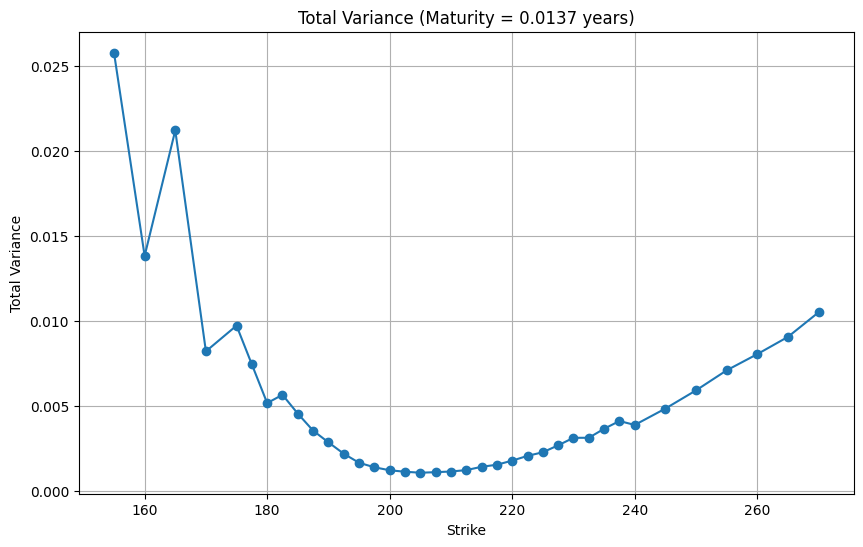

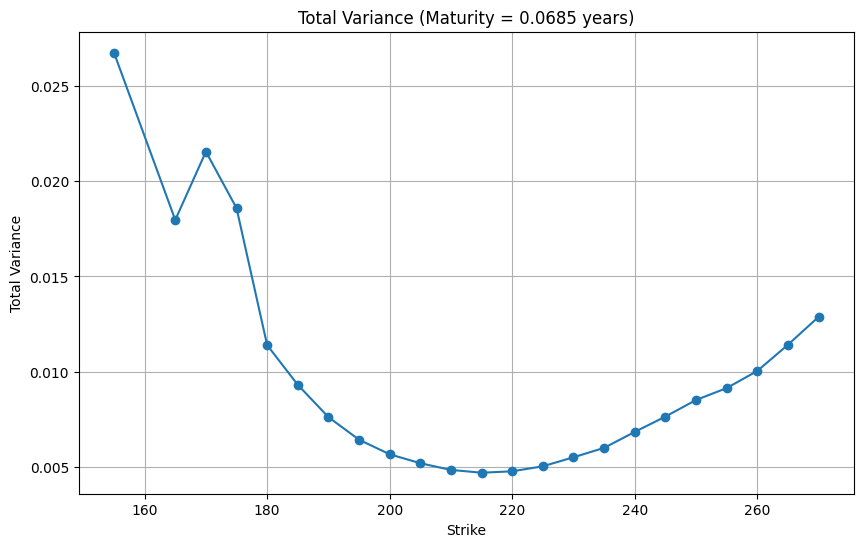

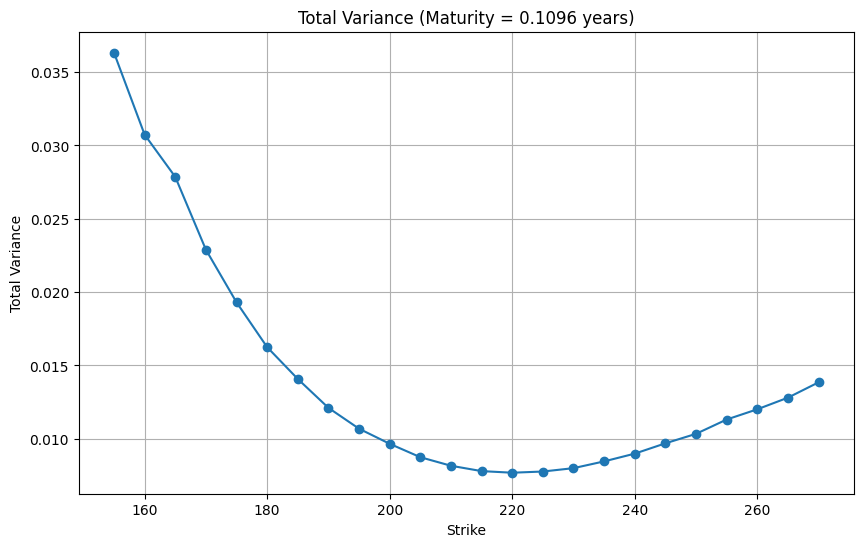

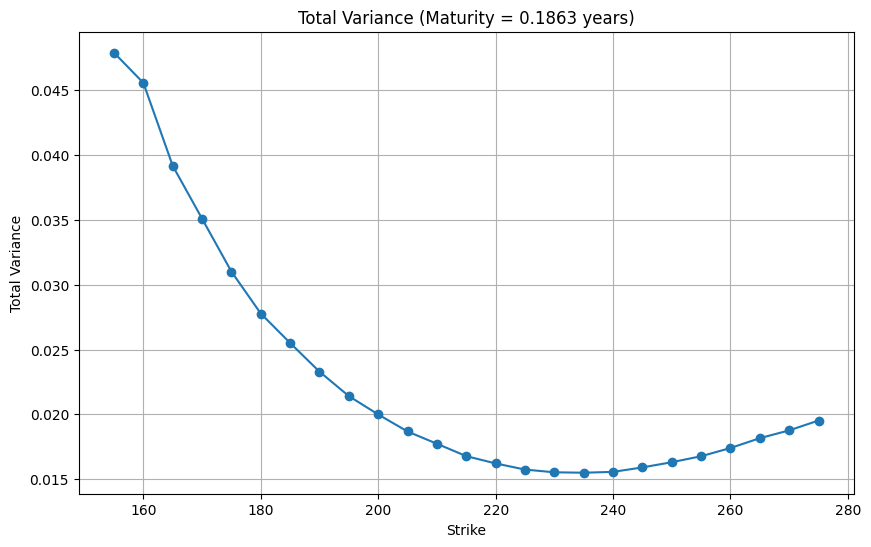

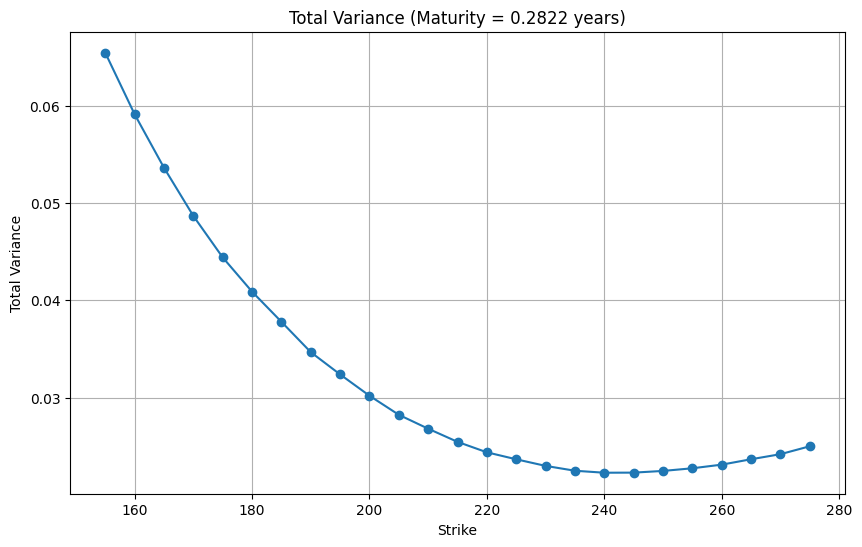

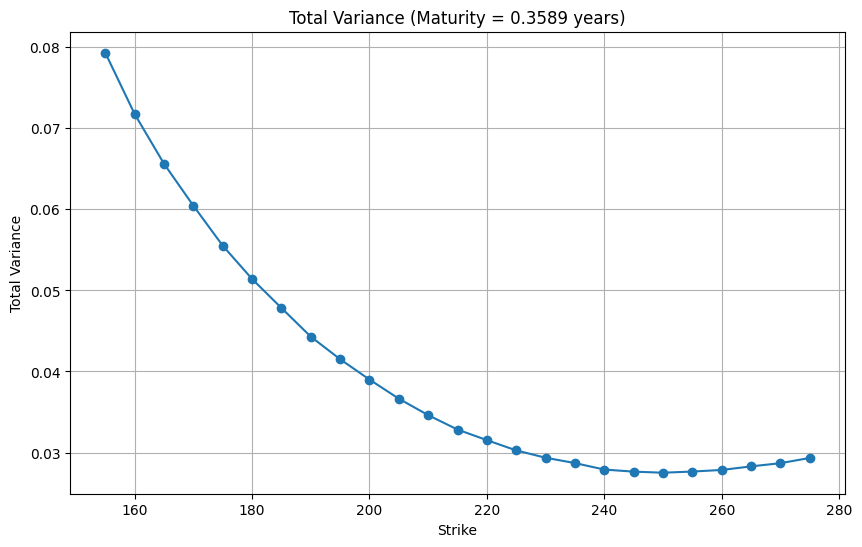

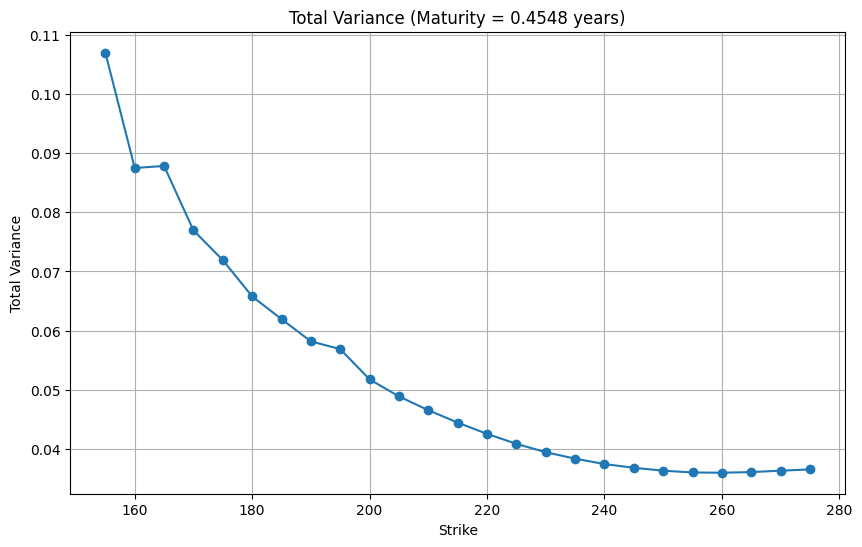

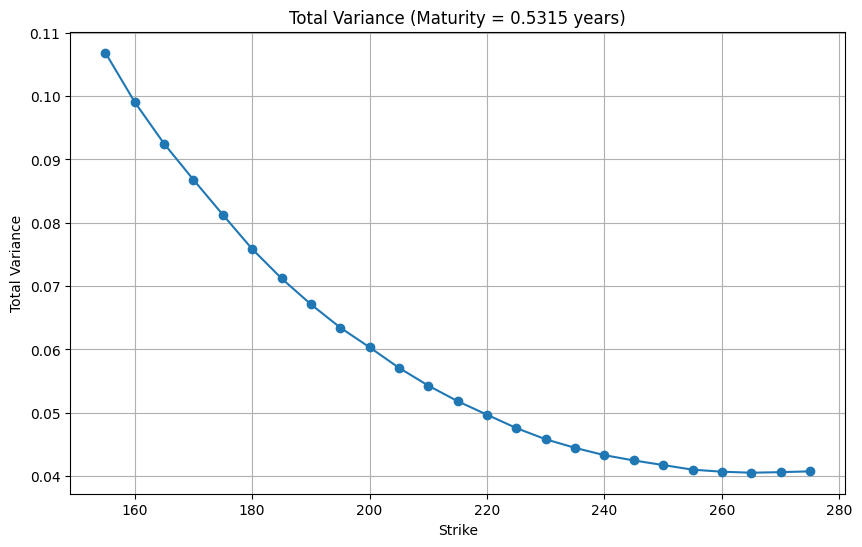

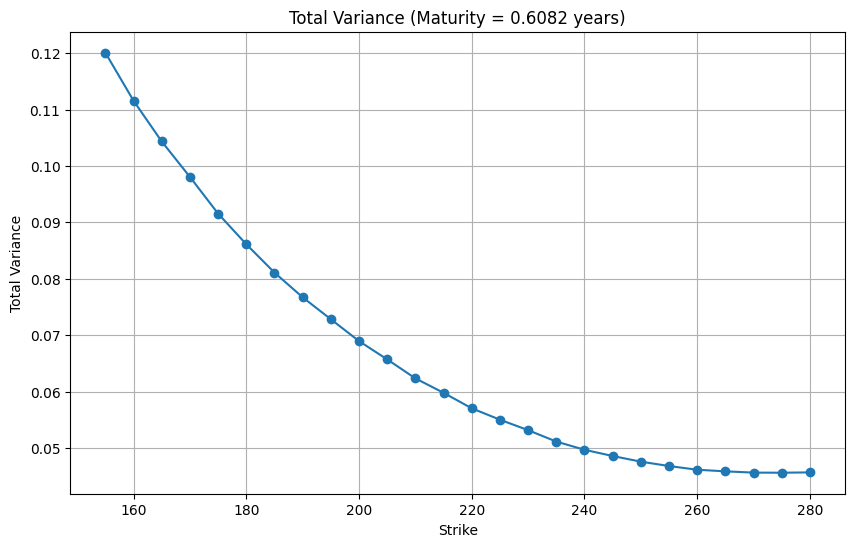

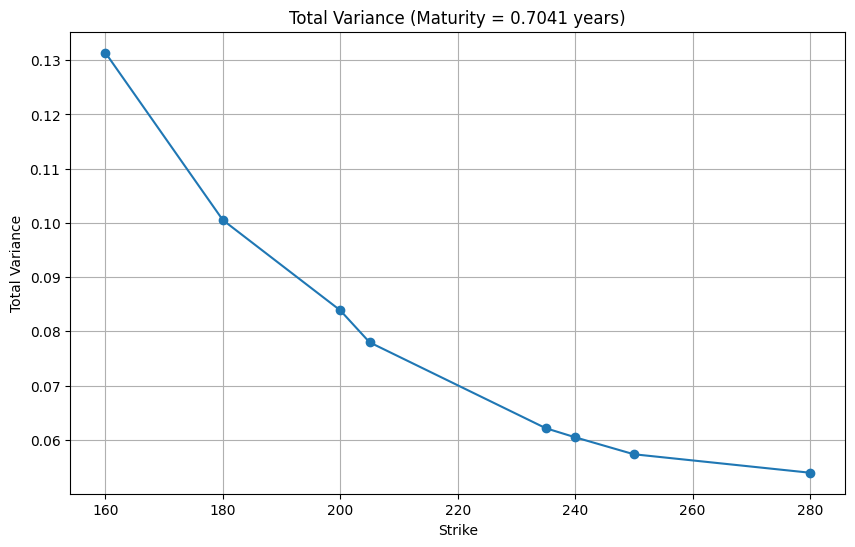

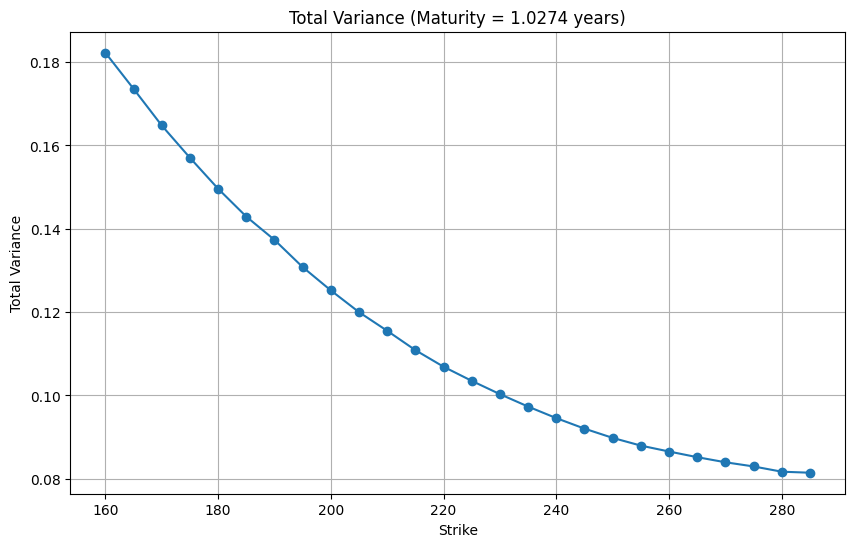

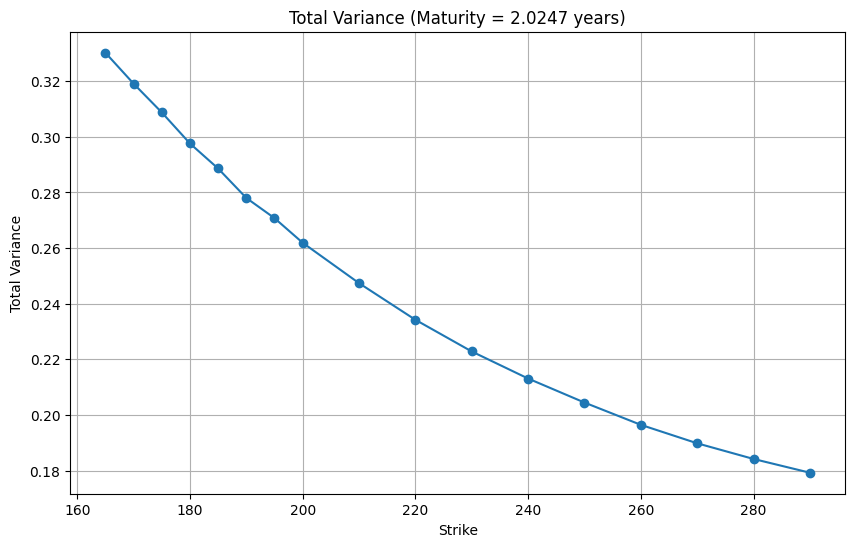

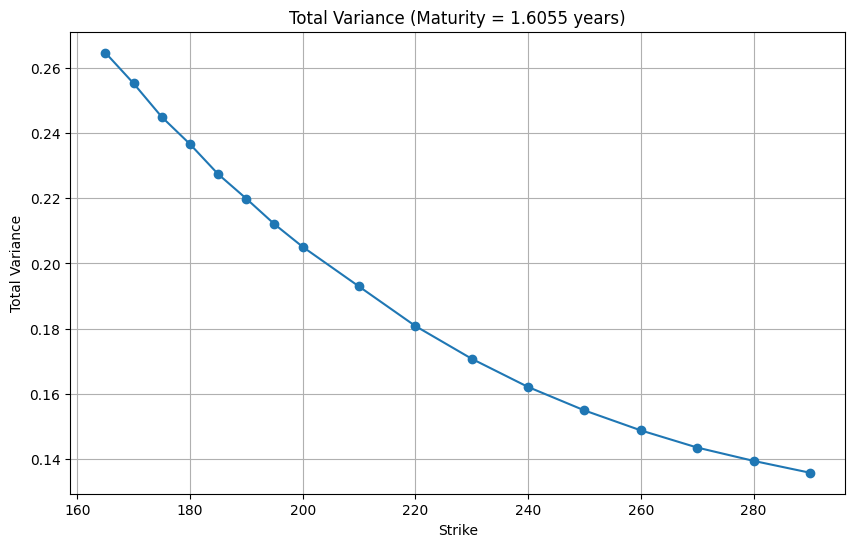

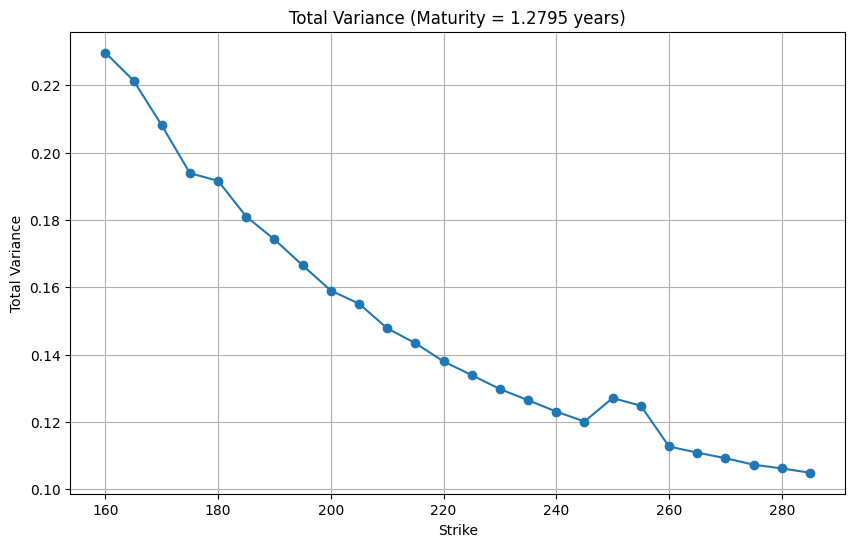

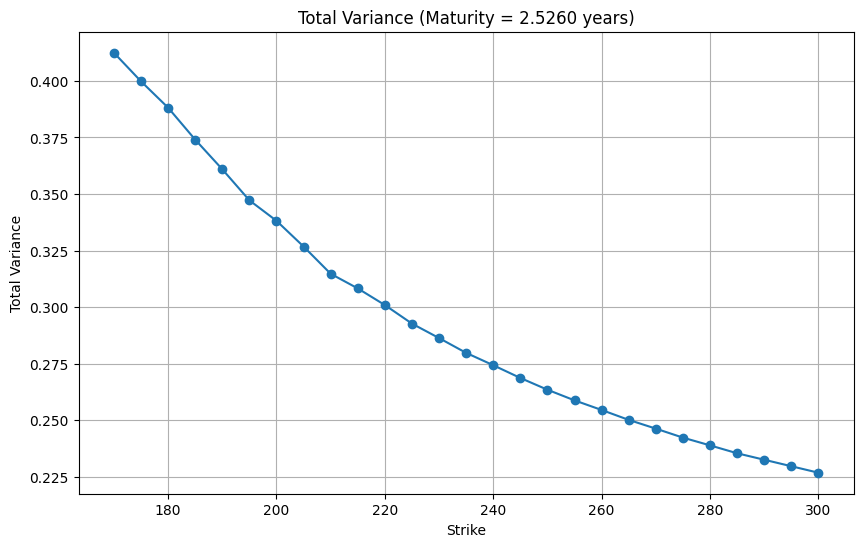

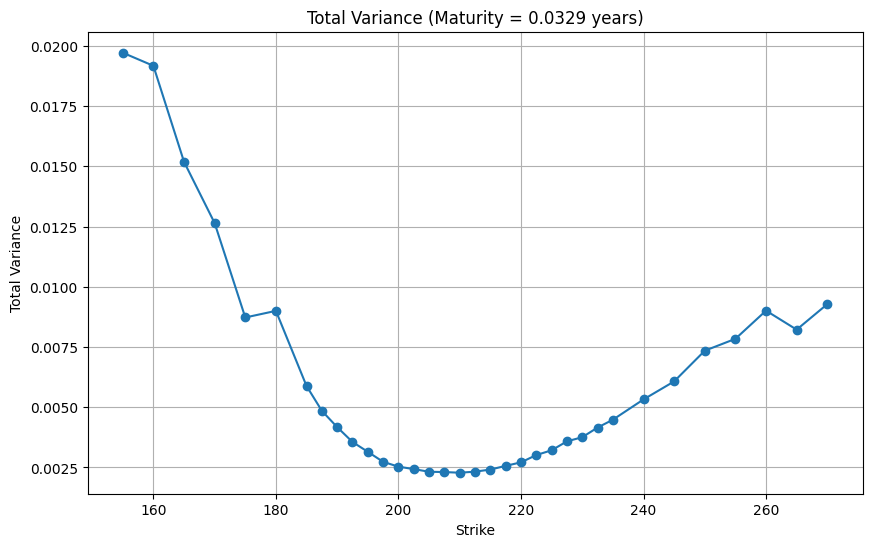

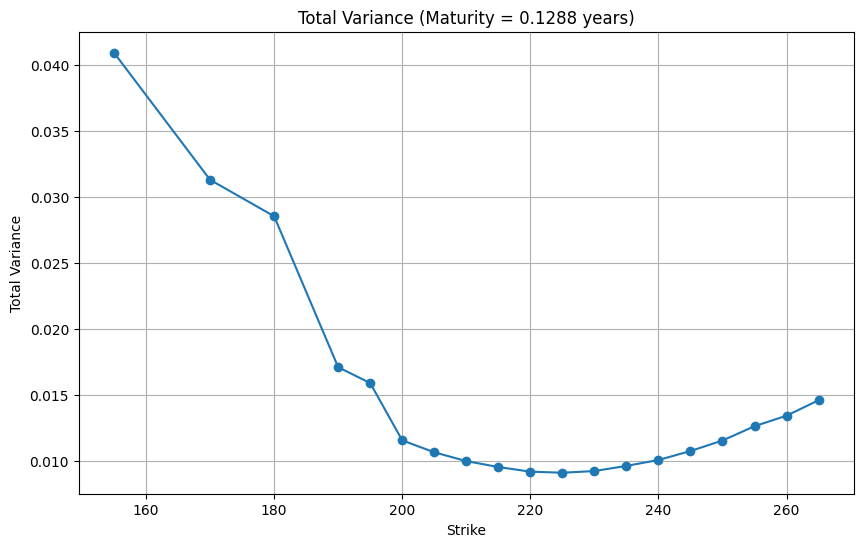

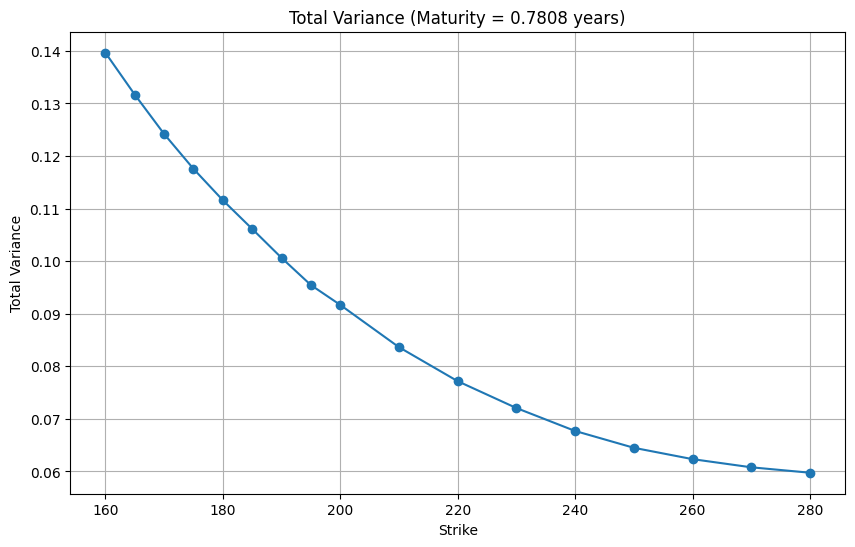

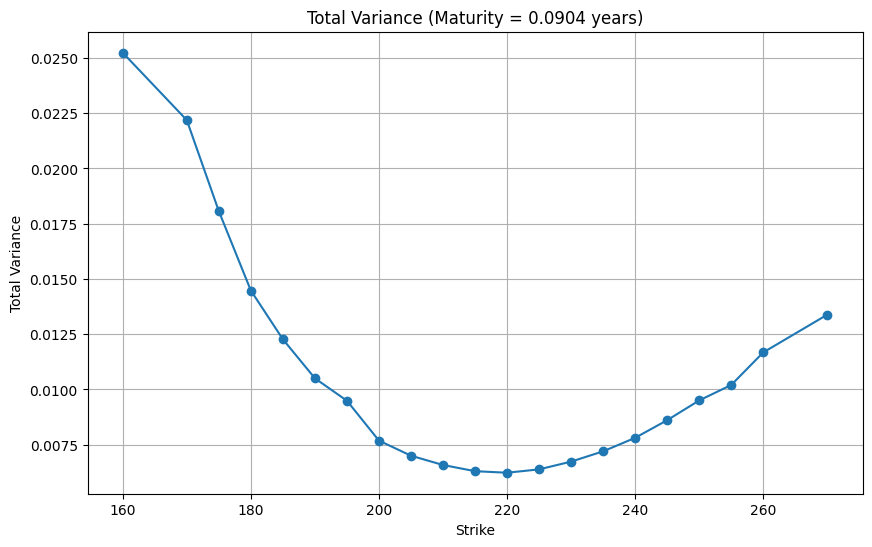

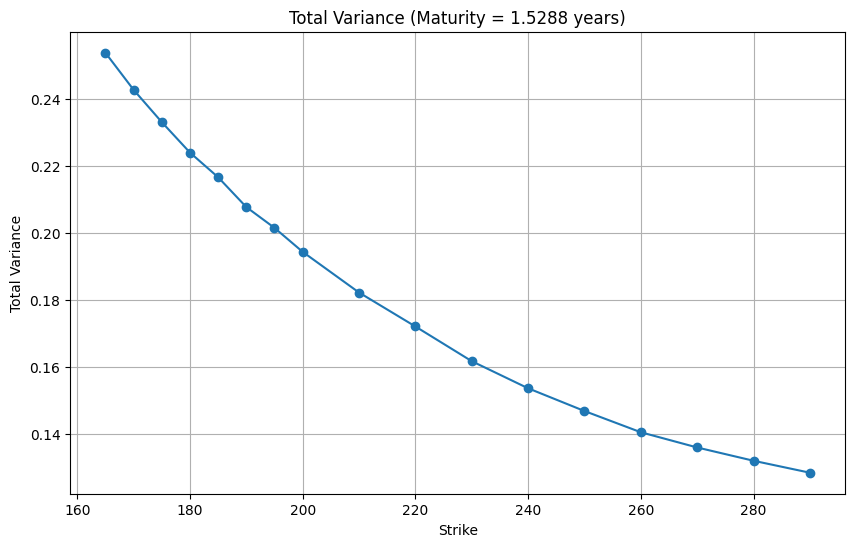

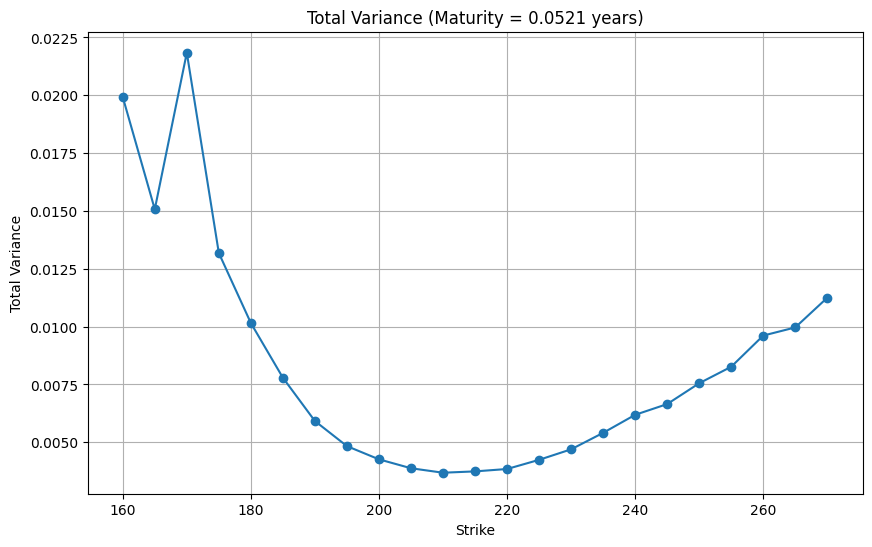

In [36]:
import matplotlib.pyplot as plt
import numpy as np

for target_maturity in set(calls["maturity"]):
    filtered_calls = calls[np.isclose(calls["maturity"], target_maturity, atol=1e-6)]

    plt.figure(figsize=(10, 6))
    plt.plot(filtered_calls["strike"], filtered_calls["totalVariance"], marker='o', linestyle='-')
    plt.title(f"Total Variance (Maturity = {target_maturity:.4f} years)")
    plt.xlabel("Strike")
    plt.ylabel("Total Variance")
    plt.grid(True)
    plt.show()

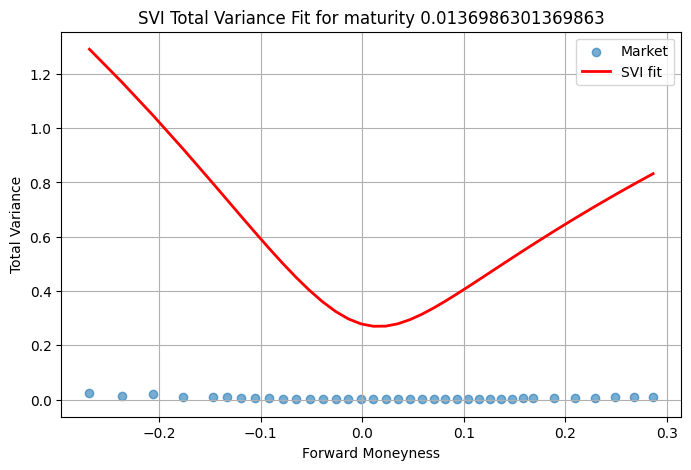

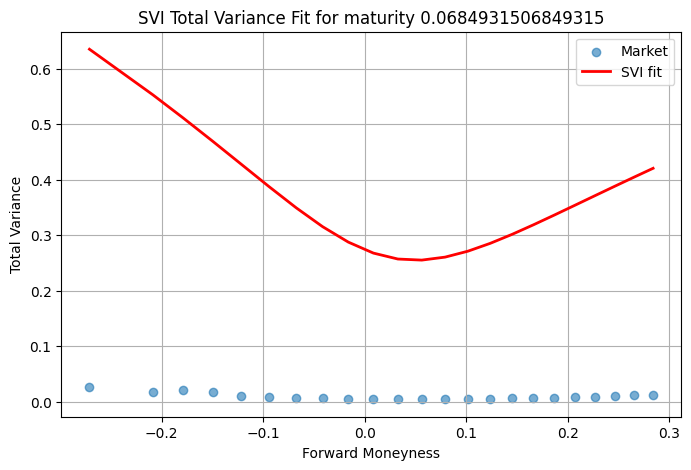

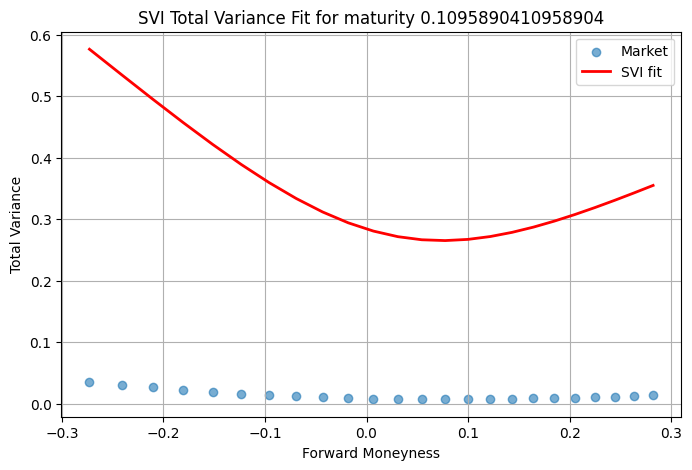

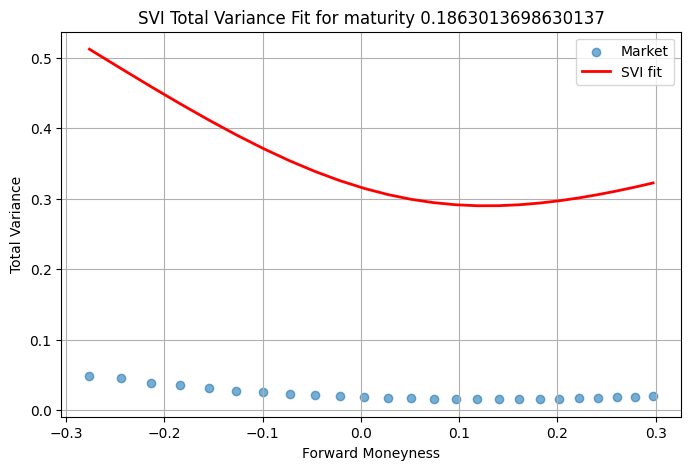

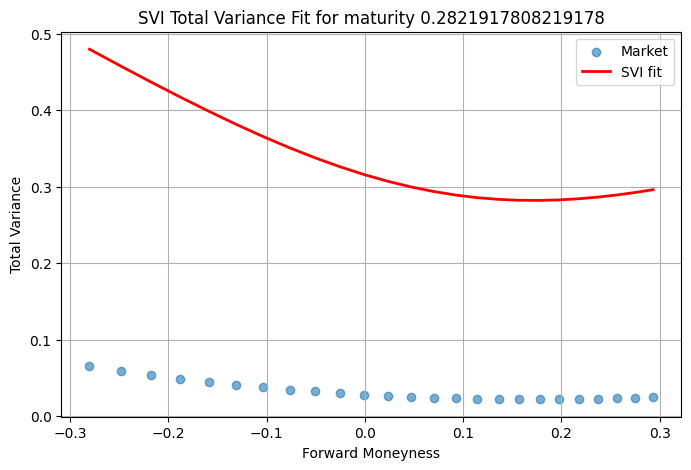

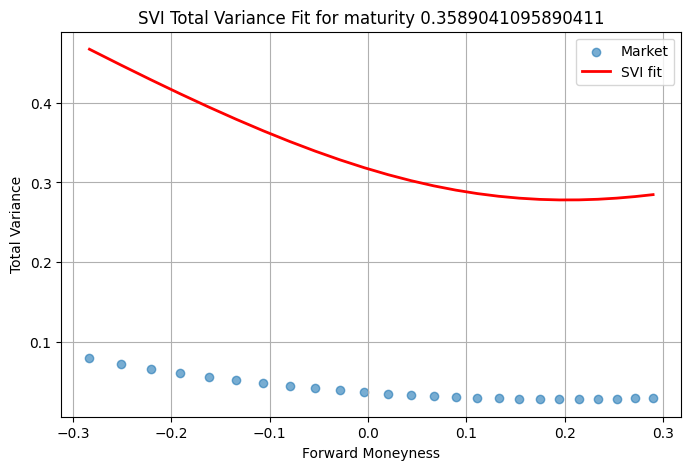

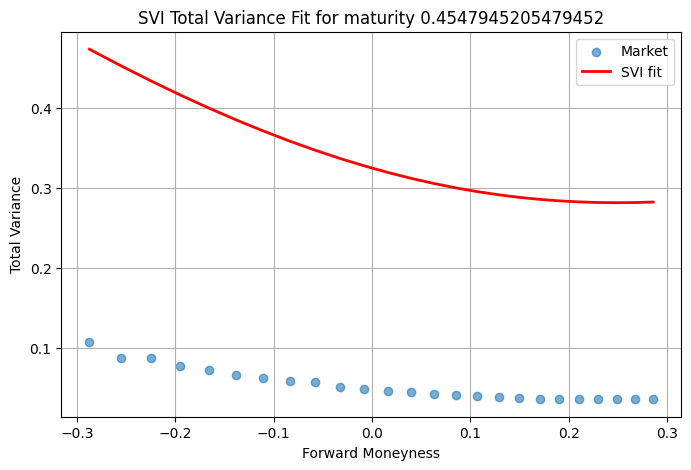

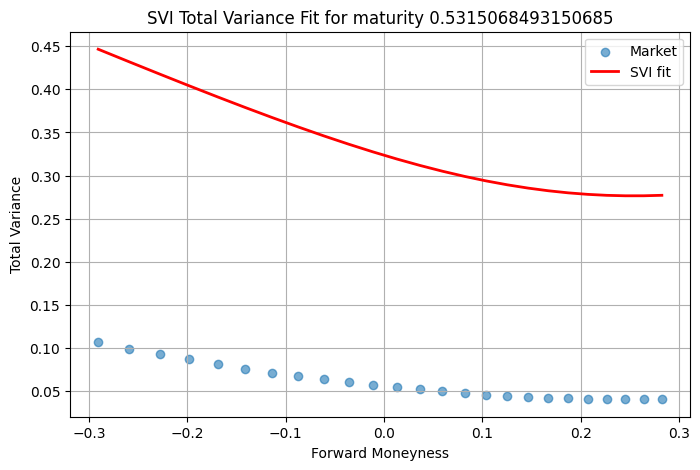

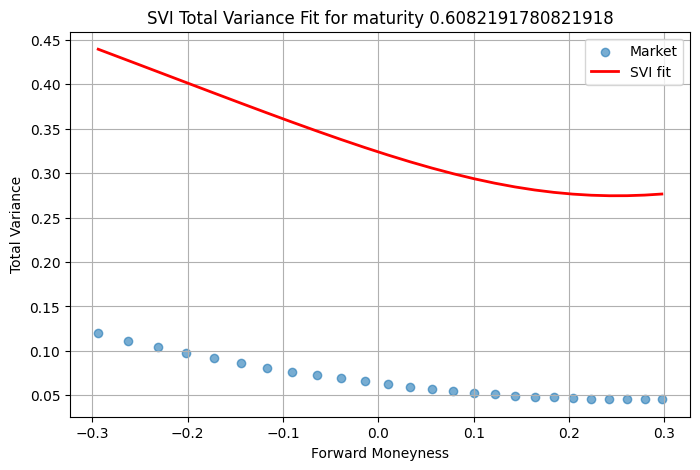

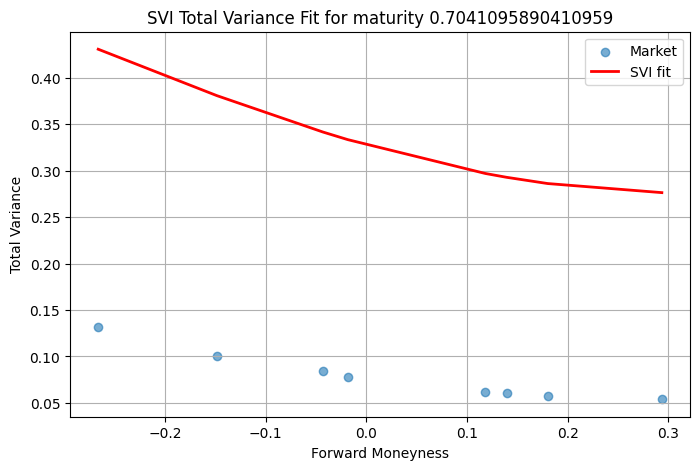

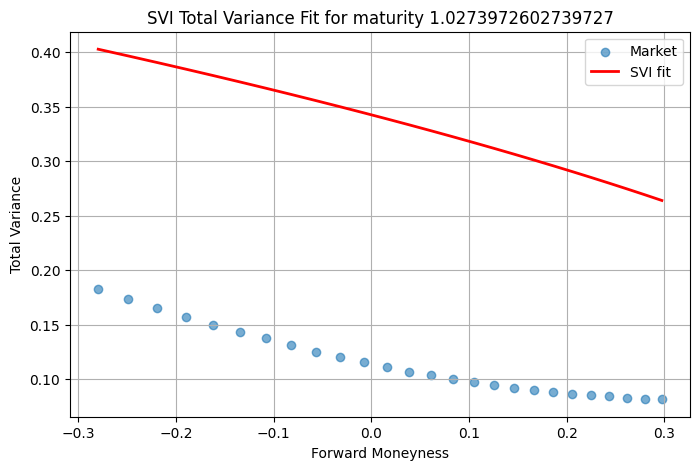

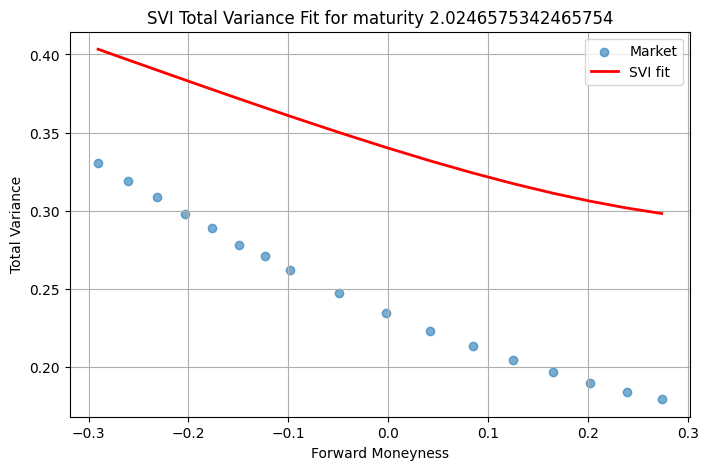

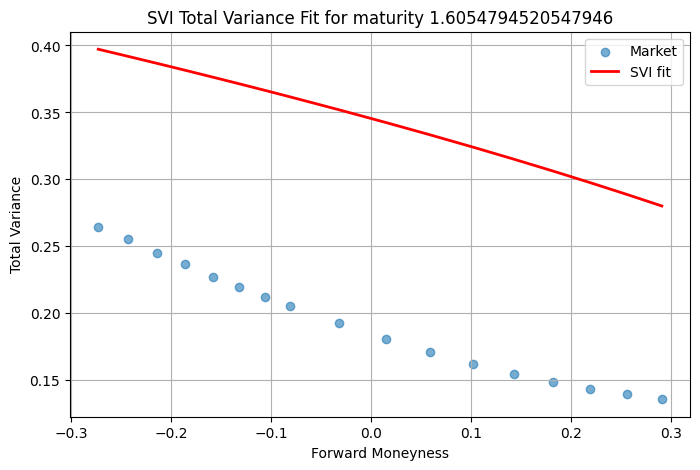

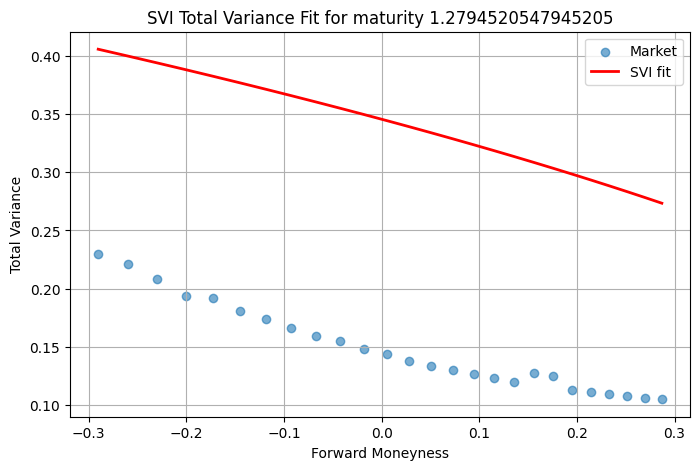

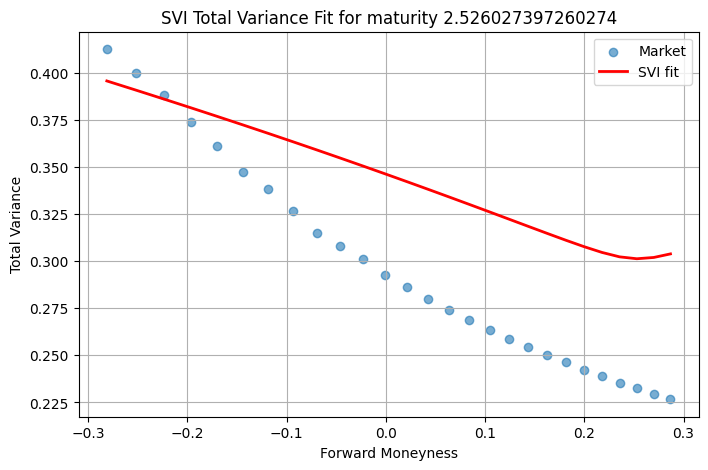

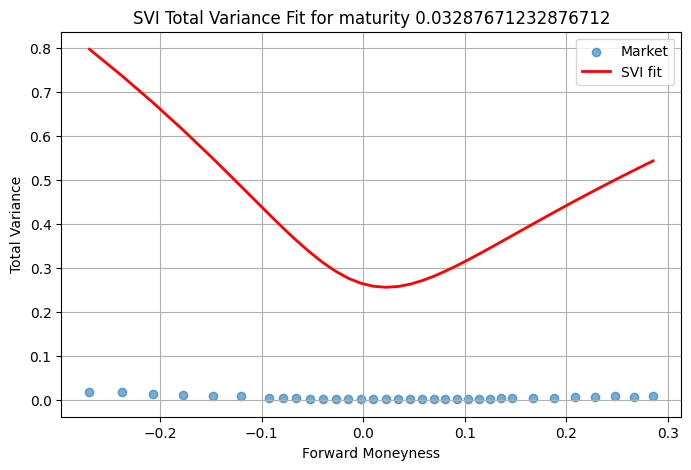

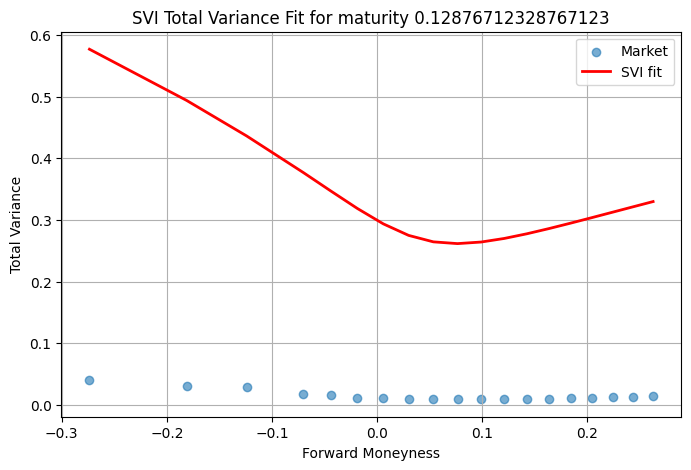

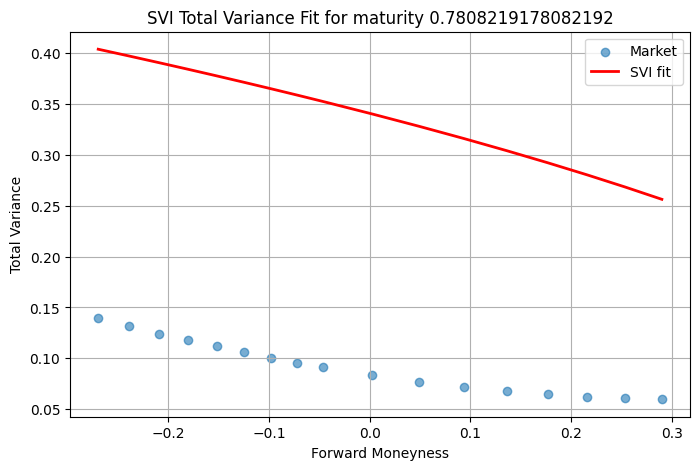

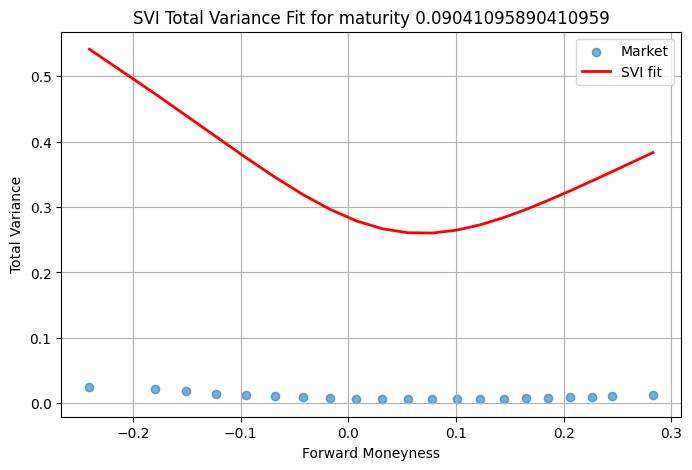

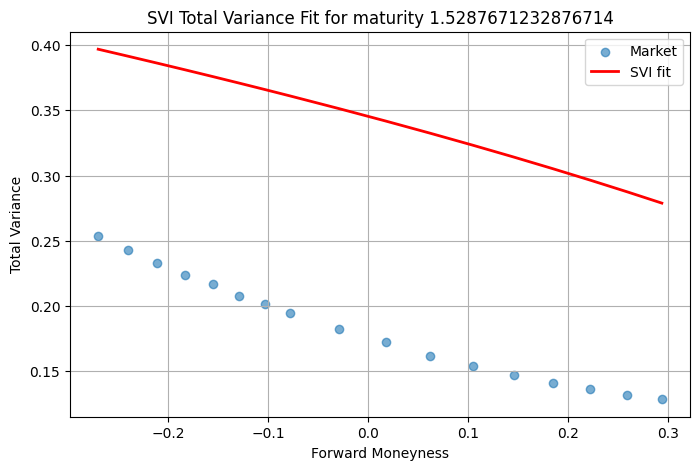

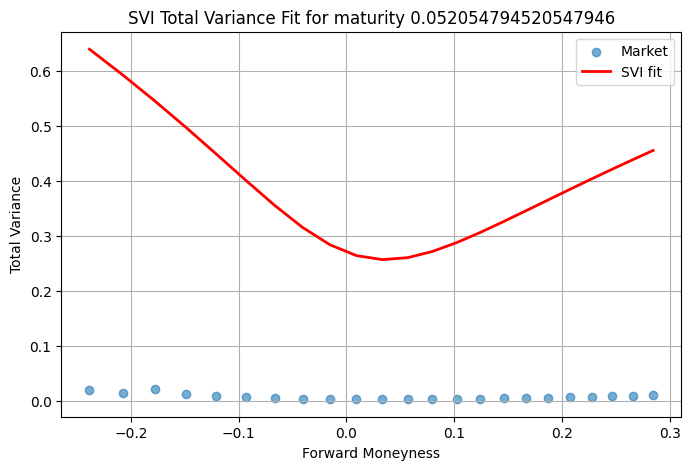

In [ ]:
from svioptimizer import SVI

for target_maturity in set(calls["maturity"]):

    filtered_calls = calls[np.isclose(calls["maturity"], target_maturity, atol=1e-6)]

    svimodel = SVI( [0.01, 0.01, 0.01, 0.01, 0.01])

    svimodel.optimize(filtered_calls["forwardMoneyness"].values, filtered_calls["totalVariance"].values)

    x = filtered_calls["forwardMoneyness"].values
    y = filtered_calls["totalVariance"].values
    y_fit = svimodel.evaluate(x)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Market", alpha=0.6)
    plt.plot(x, y_fit, color="red", label="SVI fit", linewidth=2)
    plt.xlabel("Forward Moneyness")
    plt.ylabel("Total Variance")
    plt.title(f"SVI Total Variance Fit for maturity {target_maturity}")
    plt.legend()
    plt.grid(True)
    plt.show()